In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt

In [44]:
df = pd.read_csv("/content/aqidataset.csv")

In [45]:
df.head()

,Unnamed: 0,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
0,0,01/01/2023,28,Ozone,Connecticut Hill,36-109-9991,AQS,28,.,NaN,NaN,NaN,Good,Ithaca,NY
1,1,01/02/2023,26,Ozone,Connecticut Hill,36-109-9991,AQS,26,.,NaN,NaN,NaN,Good,Ithaca,NY
2,2,01/03/2023,21,Ozone,Connecticut Hill,36-109-9991,AQS,21,.,NaN,NaN,NaN,Good,Ithaca,NY
3,3,01/04/2023,25,Ozone,Connecticut Hill,36-109-9991,AQS,25,.,NaN,NaN,NaN,Good,Ithaca,NY
4,4,01/05/2023,31,Ozone,Connecticut Hill,36-109-9991,AQS,31,.,NaN,NaN,NaN,Good,Ithaca,NY


In [46]:
df.set_index("Date", inplace = True)
df.drop("Unnamed: 0", inplace = True,axis = 1)

In [47]:
df.describe()

,Overall AQI Value
count,10924.000000
mean,53.218876
std,27.553514
min,0.000000
25%,38.000000
50%,47.000000
75%,61.000000
max,688.000000


In [48]:
df.dtypes

Overall AQI Value              int64
Main Pollutant                object
Site Name (of Overall AQI)    object
Site ID (of Overall AQI)      object
Source (of Overall AQI)       object
Ozone                         object
PM25                          object
CO                            object
PM10                          object
NO2                           object
AQI category                  object
city                          object
state                         object
dtype: object

In [49]:
df.tail()
df = df.replace('.', np.nan)

In [50]:
df.isna().sum()

Overall AQI Value                0
Main Pollutant                   0
Site Name (of Overall AQI)     134
Site ID (of Overall AQI)         0
Source (of Overall AQI)          0
Ozone                          871
PM25                           398
CO                            2613
PM10                          2910
NO2                           2331
AQI category                     0
city                             0
state                            0
dtype: int64

In [51]:
df.dropna(axis = 0, inplace = True)

In [52]:
df.head()

,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
Date,,,,,,,,,,,,,
01/01/2023,74,PM2.5,REGIONAL OFFICE BUILDING,17-031-4007,AQS,15,74,7,26.0,21.0,Moderate,Chicago,IL
01/02/2023,73,PM2.5,Hammond- 167th St,18-089-0036,AQS,19,73,7,19.0,28.0,Moderate,Chicago,IL
01/03/2023,55,PM2.5,Hammond- 167th St,18-089-0036,AQS,19,55,6,31.0,25.0,Moderate,Chicago,IL
01/04/2023,37,PM2.5,VILLAGE GARAGE,17-031-0001,AQS,21,37,3,17.0,25.0,Good,Chicago,IL
01/05/2023,54,PM2.5,CHIWAUKEE PRAIRIE STATELINE,55-059-0019,AQS,20,54,5,19.0,29.0,Moderate,Chicago,IL


In [53]:
df.shape

(6494, 13)

In [54]:
df.isna().sum()

Overall AQI Value             0
Main Pollutant                0
Site Name (of Overall AQI)    0
Site ID (of Overall AQI)      0
Source (of Overall AQI)       0
Ozone                         0
PM25                          0
CO                            0
PM10                          0
NO2                           0
AQI category                  0
city                          0
state                         0
dtype: int64

In [55]:
df.drop("Site ID (of Overall AQI)", axis = True, inplace = True)

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

categoricalData = ["Main Pollutant", "Site Name (of Overall AQI)", "Source (of Overall AQI)", "AQI category", "city", "state"]

for col in categoricalData:
  df[col] = le.fit_transform(df[col])

In [58]:
df.head()

,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
Date,,,,,,,,,,,,
01/01/2023,74,4,269,0,15,74,7,26.0,21.0,2,4,6
01/02/2023,73,4,136,0,19,73,7,19.0,28.0,2,4,6
01/03/2023,55,4,136,0,19,55,6,31.0,25.0,2,4,6
01/04/2023,37,4,333,0,21,37,3,17.0,25.0,0,4,6
01/05/2023,54,4,39,0,20,54,5,19.0,29.0,2,4,6


In [59]:
df.tail()

,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
Date,,,,,,,,,,,,
12/17/2023,83,4,193,0,45,83,6,11,17,2,21,18
12/20/2023,63,4,70,1,41,63,7,6,25,2,21,18
12/23/2023,56,4,193,0,40,56,6,8,25,2,21,18
12/26/2023,39,2,200,0,39,26,3,4,27,0,21,18
12/29/2023,41,2,200,0,41,38,2,6,30,0,21,18


In [61]:
glue = df.corr()

<Axes: >

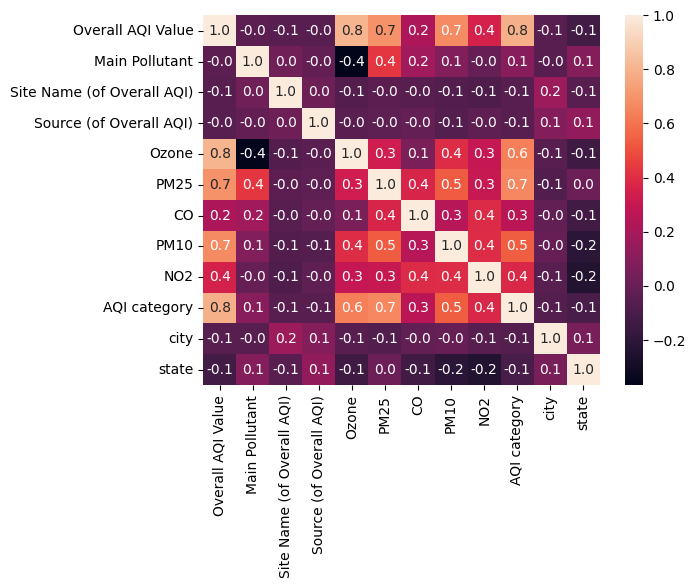

In [62]:
sn.heatmap(glue, annot=True, fmt=".1f")

In [63]:
# Multiple Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score




In [73]:
y = df["AQI category"]

In [76]:
X = df.drop(["AQI category", "Main Pollutant", "state" , "city", "Source (of Overall AQI)", "Site Name (of Overall AQI)"], axis = 1)
X

,Overall AQI Value,Ozone,PM25,CO,PM10,NO2
Date,,,,,,
01/01/2023,74,15,74,7,26.0,21.0
01/02/2023,73,19,73,7,19.0,28.0
01/03/2023,55,19,55,6,31.0,25.0
01/04/2023,37,21,37,3,17.0,25.0
01/05/2023,54,20,54,5,19.0,29.0
...,...,...,...,...,...,...
12/17/2023,83,45,83,6,11,17
12/20/2023,63,41,63,7,6,25
12/23/2023,56,40,56,6,8,25


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [78]:
clf = LogisticRegression()

In [79]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
y_pred = clf.predict(X_test)

In [81]:
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 74.05696689761355


In [82]:
from sklearn.metrics import classification_report

In [87]:
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       621
           1       0.00      0.00      0.00         1
           2       0.75      0.71      0.73       565
           3       0.09      0.06      0.07        18
           4       0.35      0.36      0.35        90
           5       0.00      0.00      0.00         4

    accuracy                           0.74      1299
   macro avg       0.33      0.33      0.33      1299
weighted avg       0.74      0.74      0.74      1299



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Naive Bayes Classifier

In [95]:
from sklearn.naive_bayes import GaussianNB
y = df["AQI category"]
X = df.drop(["AQI category", "Main Pollutant", "state" , "city", "Source (of Overall AQI)", "Site Name (of Overall AQI)"], axis = 1)
X

,Overall AQI Value,Ozone,PM25,CO,PM10,NO2
Date,,,,,,
01/01/2023,74,15,74,7,26.0,21.0
01/02/2023,73,19,73,7,19.0,28.0
01/03/2023,55,19,55,6,31.0,25.0
01/04/2023,37,21,37,3,17.0,25.0
01/05/2023,54,20,54,5,19.0,29.0
...,...,...,...,...,...,...
12/17/2023,83,45,83,6,11,17
12/20/2023,63,41,63,7,6,25
12/23/2023,56,40,56,6,8,25


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [98]:
y_pred = gnb.predict(X_test)

In [99]:
print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 91.68591224018475


In [100]:
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       626
           2       0.95      0.87      0.91       569
           3       0.95      0.82      0.88        22
           4       0.78      0.99      0.87        79
           5       0.50      1.00      0.67         3

    accuracy                           0.92      1299
   macro avg       0.82      0.93      0.85      1299
weighted avg       0.92      0.92      0.92      1299



In [101]:
# Decison tree Without spliting the data


In [102]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [105]:
y = df["AQI category"]
X = df.drop("AQI category", axis = 1)
X

features = X.columns

In [126]:
y.max()

5

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

[Text(0.25, 0.9166666666666666, 'Overall AQI Value <= 50.5\ngini = 0.571\nsamples = 5195\nvalue = [2531, 1, 2250, 83, 321, 9]'),
 Text(0.125, 0.75, 'gini = 0.0\nsamples = 2531\nvalue = [2531, 0, 0, 0, 0, 0]'),
 Text(0.375, 0.75, 'Overall AQI Value <= 100.5\ngini = 0.271\nsamples = 2664\nvalue = [0, 1, 2250, 83, 321, 9]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 2250\nvalue = [0, 0, 2250, 0, 0, 0]'),
 Text(0.5, 0.5833333333333334, 'Overall AQI Value <= 150.5\ngini = 0.358\nsamples = 414\nvalue = [0, 1, 0, 83, 321, 9]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 321\nvalue = [0, 0, 0, 0, 321, 0]'),
 Text(0.625, 0.4166666666666667, 'Overall AQI Value <= 202.5\ngini = 0.194\nsamples = 93\nvalue = [0, 1, 0, 83, 0, 9]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 83\nvalue = [0, 0, 0, 83, 0, 0]'),
 Text(0.75, 0.25, 'Overall AQI Value <= 489.0\ngini = 0.18\nsamples = 10\nvalue = [0, 1, 0, 0, 0, 9]'),
 Text(0.625, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue =

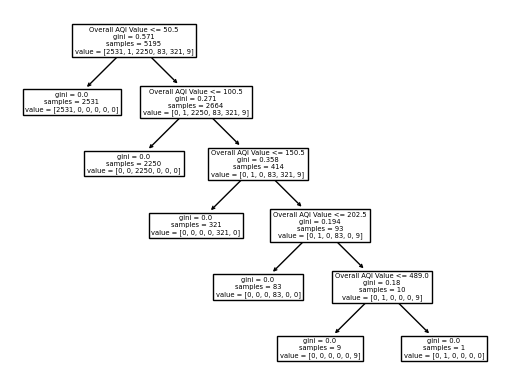

In [113]:
tree.plot_tree(dtree, feature_names=features)

In [114]:
y_pred = dtree.predict(X_test)

In [115]:
print("Decision Tree accuracy(in %):", accuracy_score(y_test, y_pred)*100)

Decision Tree accuracy(in %): 100.0


In [116]:
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       591
           2       1.00      1.00      1.00       593
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        92
           5       1.00      1.00      1.00         3

    accuracy                           1.00      1299
   macro avg       1.00      1.00      1.00      1299
weighted avg       1.00      1.00      1.00      1299



In [ ]:
# KNN for classification

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
classifier= KNeighborsClassifier(n_neighbors=5)

In [121]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [135]:
y_pred = classifier.predict(X_test)

In [136]:
print("KNN accuracy(in %):", accuracy_score(y_test, y_pred)*100)

KNN accuracy(in %): 93.9183987682833


In [137]:
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       591
           2       0.95      0.93      0.94       593
           3       0.74      0.85      0.79        20
           4       0.92      0.89      0.91        92
           5       0.00      0.00      0.00         3

    accuracy                           0.94      1299
   macro avg       0.71      0.73      0.72      1299
weighted avg       0.94      0.94      0.94      1299



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
# SVM

In [139]:
from sklearn.svm import SVC

In [152]:
svm = SVC(kernel="rbf")

In [153]:
svm.fit(X_train, y_train)

SVC()

In [154]:
y_pred = svm.predict(X_test)

In [155]:
print("SVM accuracy(in %):", accuracy_score(y_test, y_pred)*100)

SVM accuracy(in %): 95.30408006158584


In [156]:
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       591
           2       0.96      0.95      0.96       593
           3       0.80      0.80      0.80        20
           4       0.92      0.89      0.91        92
           5       0.00      0.00      0.00         3

    accuracy                           0.95      1299
   macro avg       0.73      0.72      0.73      1299
weighted avg       0.95      0.95      0.95      1299



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
#linear SVM

In [160]:
svm = SVC(kernel="linear")

In [161]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [162]:
y_pred = svm.predict(X_test)

In [163]:
print("SVM accuracy(in %):", accuracy_score(y_test, y_pred)*100)

SVM accuracy(in %): 99.84603541185527


In [164]:
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       591
           2       1.00      1.00      1.00       593
           3       0.95      0.95      0.95        20
           4       0.99      1.00      0.99        92
           5       1.00      0.67      0.80         3

    accuracy                           1.00      1299
   macro avg       0.99      0.92      0.95      1299
weighted avg       1.00      1.00      1.00      1299



In [165]:
# Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [168]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [169]:
y_pred = rf_classifier.predict(X_test)

In [170]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [171]:
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       591
           2       1.00      1.00      1.00       593
           3       0.95      1.00      0.98        20
           4       1.00      1.00      1.00        92
           5       1.00      0.67      0.80         3

    accuracy                           1.00      1299
   macro avg       0.99      0.93      0.96      1299
weighted avg       1.00      1.00      1.00      1299



In [172]:
# Ensembale Model


In [173]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [174]:
logreg_clf = LogisticRegression(max_iter=1000, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)


In [175]:
voting_clf = VotingClassifier(
estimators=[('lr', logreg_clf), ('dt', tree_clf), ('svm', svm_clf)],
voting='hard'
)

In [176]:
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm', SVC(kernel='linear', random_state=42))])

In [177]:
y_pred_voting = voting_clf.predict(X_test)


In [178]:
report_voting = classification_report(y_test, y_pred_voting)
print("Classification Report for Voting Ensemble Classifier:\n", report_voting)

Classification Report for Voting Ensemble Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       591
           2       1.00      1.00      1.00       593
           3       0.95      0.95      0.95        20
           4       0.99      1.00      0.99        92
           5       1.00      0.67      0.80         3

    accuracy                           1.00      1299
   macro avg       0.99      0.92      0.95      1299
weighted avg       1.00      1.00      1.00      1299



In [179]:
# adaBoost BOOST


In [180]:
from sklearn.ensemble import AdaBoostClassifier


In [181]:
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

In [182]:
adaboost_clf.fit(X_train, y_train)


AdaBoostClassifier(random_state=42)

In [183]:
y_pred_adaboost = adaboost_clf.predict(X_test)

In [184]:
report_adaboost = classification_report(y_test, y_pred_adaboost)
print("Classification Report for AdaBoost Classifier:\n", report_adaboost)

Classification Report for AdaBoost Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       591
           2       0.84      1.00      0.91       593
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        92
           5       0.00      0.00      0.00         3

    accuracy                           0.91      1299
   macro avg       0.37      0.40      0.38      1299
weighted avg       0.84      0.91      0.87      1299



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
# Gradient Boosting

In [187]:
# Create and train the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradientboost_clf.fit(X_train, y_train)
# Predict using the trained model
y_pred_gradientboost = gradientboost_clf.predict(X_test)
# Generate the classification report for Gradient Boosting
report_gradientboost = classification_report(y_test, y_pred_gradientboost)
print("Classification Report for Gradient Boosting Classifier:\n", report_gradientboost)

Classification Report for Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       591
           2       1.00      1.00      1.00       593
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        92
           5       1.00      1.00      1.00         3

    accuracy                           1.00      1299
   macro avg       1.00      1.00      1.00      1299
weighted avg       1.00      1.00      1.00      1299



In [188]:
# Bagging technique using decision tree classifier

In [189]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
base_classifier = DecisionTreeClassifier(random_state=42)
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_pred = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print(f"Bagging Accuracy: {bagging_accuracy}")
# Classification report
bagging_classification_report = classification_report(y_test, bagging_pred)
print("Bagging Classification Report:")
print(bagging_classification_report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 1.0
Bagging Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       591
           2       1.00      1.00      1.00       593
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        92
           5       1.00      1.00      1.00         3

    accuracy                           1.00      1299
   macro avg       1.00      1.00      1.00      1299
weighted avg       1.00      1.00      1.00      1299

